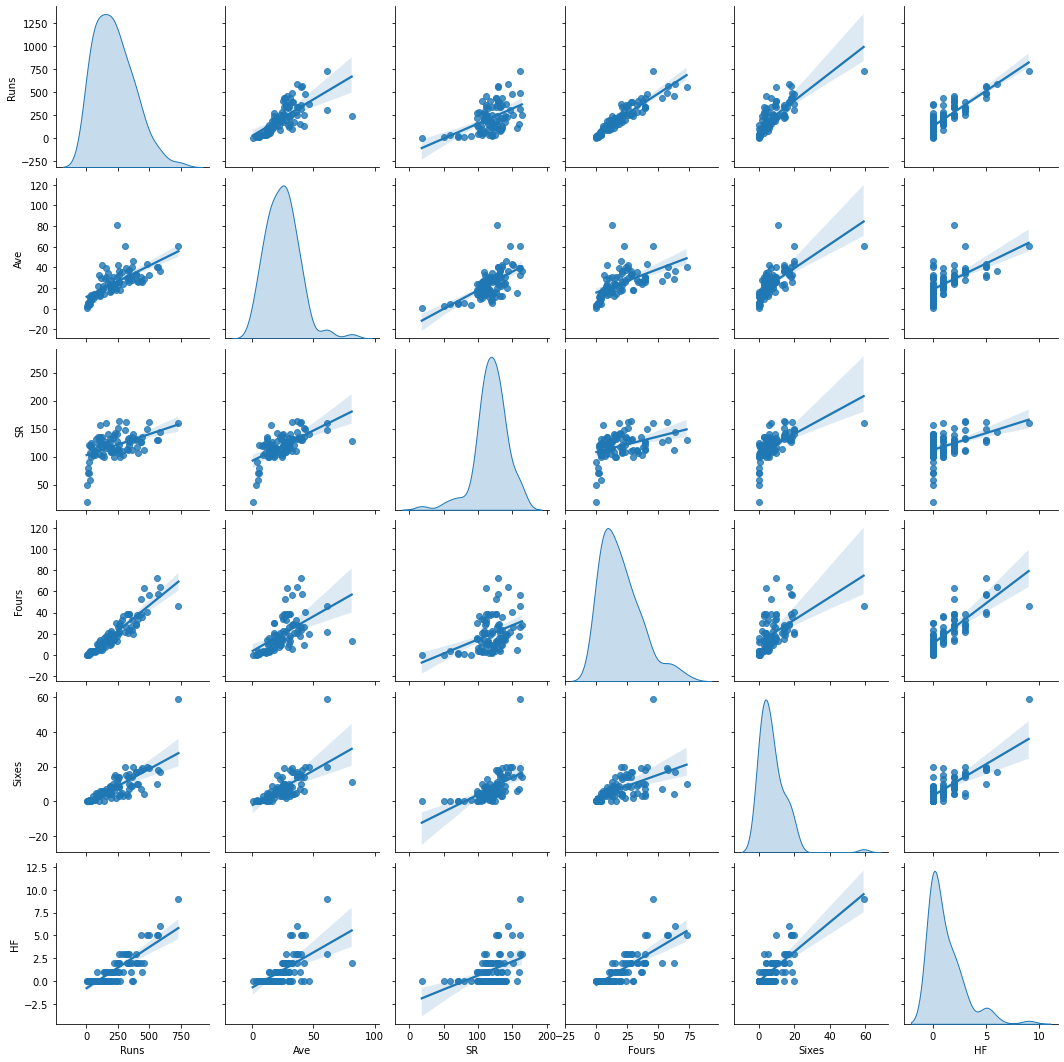

In [1]:
import pandas as p
d=p.read_csv('batting_bowling_ipl_bat.csv')
import seaborn as s
s.pairplot(d,diag_kind='kde',kind='reg')

runs is positively correlated with ave,sr,fours,sixes,hf. ave is positively correlated with sr,fours,sixes,hf. sr is positively correlated with fours,sixes,hf. fours is positively correlated with sixes,hf. sixes is positively correlated with hf. runs,avg,fours,sixes,hf have right skewed distributions and sr has a left skewed distibution

In [15]:
import pandas_profiling
pandas_profiling.ProfileReport(d)

In [16]:
d.shape

(180, 7)

In [2]:
d.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [18]:
d

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
d.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [21]:
d.dropna(inplace=True)

In [22]:
d.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

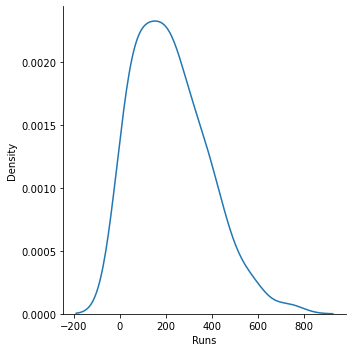

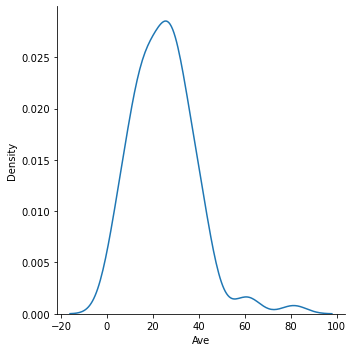

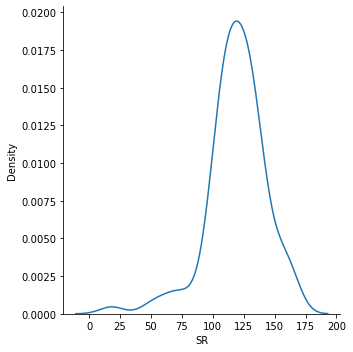

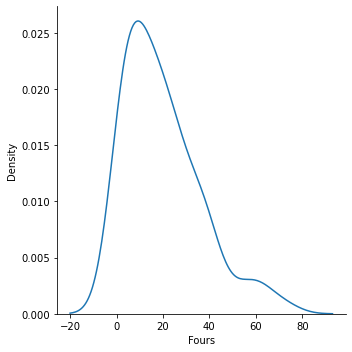

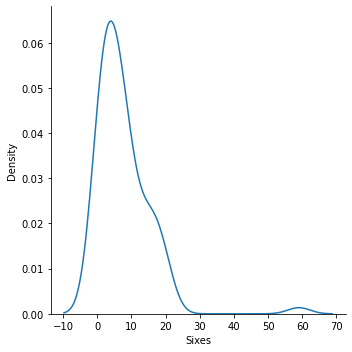

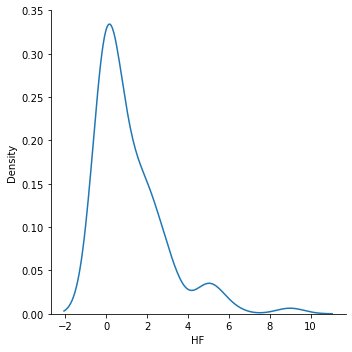

In [23]:
for i in range(1,len(d.columns.to_list())):
    s.displot(d[d.columns[i]],kind='kde')

In [24]:
d.corr()

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


<AxesSubplot:>

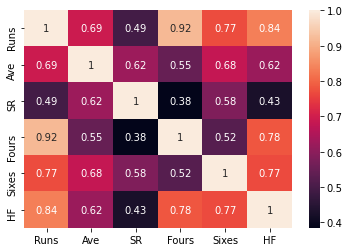

In [25]:
s.heatmap(d.corr(),annot=True)

there is a lot of multi collinearity

In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


the data has 90 instances with 6 attributes and all being float type. no null values in any column

In [27]:
d.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


data looks legit as all statistics seem reasonable. looking at all columns data looks representative of true distribution of all coumns. very few people have scored more than 2 hf, most of them have scored 2 or less hf. very few people have scored more than 10 sixes, most of them have scored 10 or less sixes. very few people have scored more than 28 fours, most of them have scored 28 or less fours. very few people have scored more than 330 runs, most of them have scored 330 or less runs. very few people have an ave more than 32, most of them have an ave 32 or less. very few people have a sr more than 131, most of them have a sr 131 or less.

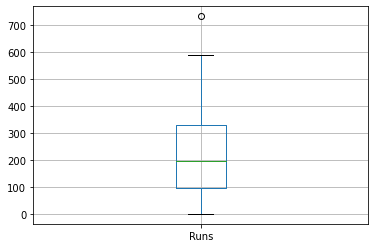

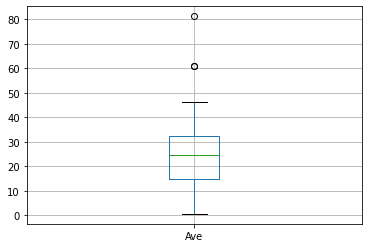

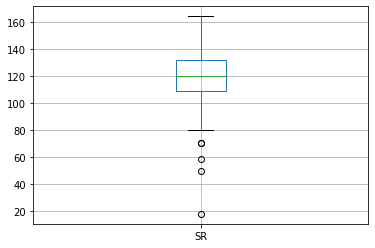

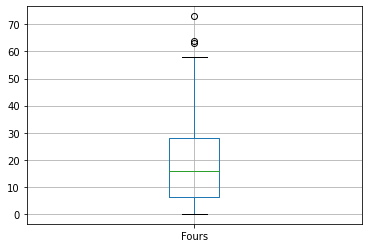

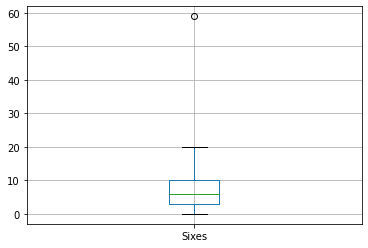

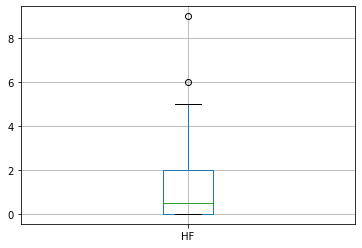

In [28]:
import matplotlib.pyplot as pl
for i in range(1,len(d.columns.to_list())):
    d.boxplot(d.columns[i])
    pl.show()

all of them have extreme value/s

In [29]:
d.quantile(.75)-d.quantile(.25)

Runs     232.7500
Ave       17.5300
SR        23.2525
Fours     21.7500
Sixes      7.0000
HF         2.0000
dtype: float64

In [30]:
n=d.drop('Name',axis=1)
n.max()-n.min()

Runs     731.00
Ave       80.83
SR       145.92
Fours     73.00
Sixes     59.00
HF         9.00
dtype: float64

In [31]:
n.var()

Runs     24415.208989
Ave        185.483008
SR         559.632193
Fours      268.954931
Sixes       64.021973
HF           2.851561
dtype: float64

In [32]:
n.skew()

Runs     0.754618
Ave      1.038076
SR      -1.166175
Fours    1.107192
Sixes    3.226595
HF       2.001199
dtype: float64

In [36]:
n.sort_values(by=['Ave','SR','Runs','HF','Sixes','Fours'],ascending=False)

,Runs,Ave,SR,Fours,Sixes,HF
19,244.0,81.33,128.42,13.0,11.0,2.0
1,733.0,61.08,160.74,46.0,59.0,9.0
13,305.0,61.00,147.34,22.0,20.0,3.0
29,371.0,46.37,140.53,20.0,20.0,0.0
7,479.0,43.54,149.68,41.0,20.0,5.0
...,...,...,...,...,...,...
175,30.0,5.00,58.82,4.0,0.0,0.0
173,19.0,4.75,70.37,2.0,0.0,0.0
167,19.0,3.80,90.47,0.0,1.0,0.0
177,6.0,3.00,50.00,0.0,0.0,0.0
